In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
from sklearn.preprocessing import Binarizer

In [5]:
bi = Binarizer(threshold = 0.75)
data['Chance of Admit '] = bi.fit_transform(data[['Chance of Admit ']])

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [7]:
x = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit '].astype('int')

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [10]:
from sklearn.tree import DecisionTreeClassifier


In [11]:
c = DecisionTreeClassifier(random_state = 0)


In [12]:
c.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
y_pred = c.predict(x_test)


In [26]:
result = pd.DataFrame({
    'Actual' : y_test,
    'predicted' : y_pred
})

In [27]:
result

,Actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

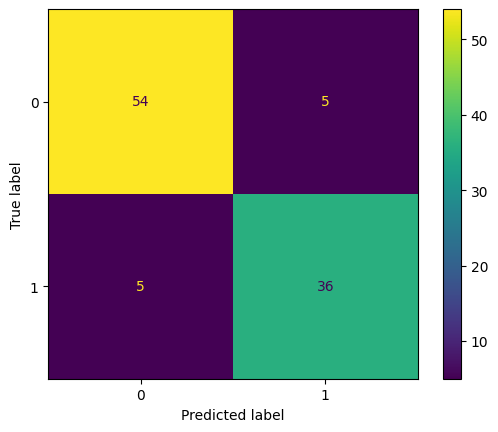

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)